This is a script that reads in a station from mesowest


In [16]:
# from RHI import *
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.animation as animation
import matplotlib.dates as mdates
import matplotlib.colors as colors
import os.path 
from datetime import datetime,timedelta
import numpy as np
import pandas as pd
from scipy import interpolate
import glob
import pickle
from datetime import timedelta
import requests
import os
import json
from herbie import Herbie,wgrib2
import pygrib
import urllib
import urllib.request as urllib2
from bs4 import BeautifulSoup

In [17]:
API_ROOT = "https://api.synopticdata.com/v2/"
API_TOKEN = "57099309cc0f4020a75285e0ea2a233b"

date_range = ['202401030000','202401052359'] # start time and end time

In [21]:

API_ROOT = "https://api.synopticdata.com/v2/"
api_request_url = os.path.join(API_ROOT, "stations/timeseries?start=202401030000&end=202401052359&vars=air_temp")
api_arguments = {"token":API_TOKEN,"stid":"SJS01"}
req = requests.get(api_request_url, params=api_arguments)
reqj = req.json()
# print(reqj['STATION'][0]['OBSERVATIONS']) # format for reading data from json file

datetimes = pd.to_datetime(reqj['STATION'][0]['OBSERVATIONS']['date_time']) # datetime read
temperature = reqj['STATION'][0]['OBSERVATIONS']['air_temp_set_1'] # temperature in C

DatetimeIndex(['2024-01-03 00:15:00+00:00', '2024-01-03 00:35:00+00:00',
               '2024-01-03 00:55:00+00:00', '2024-01-03 01:15:00+00:00',
               '2024-01-03 01:35:00+00:00', '2024-01-03 01:55:00+00:00',
               '2024-01-03 02:15:00+00:00', '2024-01-03 02:35:00+00:00',
               '2024-01-03 02:55:00+00:00', '2024-01-03 03:15:00+00:00',
               ...
               '2024-01-05 20:55:00+00:00', '2024-01-05 21:15:00+00:00',
               '2024-01-05 21:35:00+00:00', '2024-01-05 21:55:00+00:00',
               '2024-01-05 22:15:00+00:00', '2024-01-05 22:35:00+00:00',
               '2024-01-05 22:55:00+00:00', '2024-01-05 23:15:00+00:00',
               '2024-01-05 23:35:00+00:00', '2024-01-05 23:55:00+00:00'],
              dtype='datetime64[ns, UTC]', length=183, freq=None)


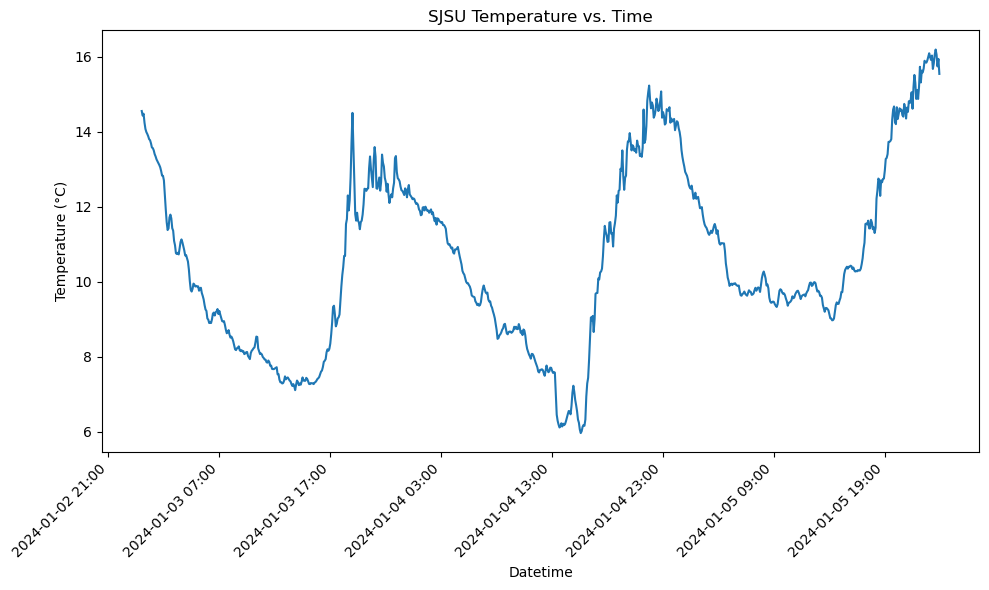

In [23]:
print(pd.to_datetime(dt))

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(datetimes, temperature)

# Set the x-axis major locator to show every 10th datetime tick
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=10))

# Format the datetime labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

# Rotate x-axis labels at a 45-degree angle
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Datetime')
plt.ylabel('Temperature (°C)')
plt.title('SJSU Temperature vs. Time')


# Tight layout to avoid label cutoff
plt.tight_layout()

# Show the plot
plt.show()